### <a href="Page_1.html" target="_self">Understanding The Data</a>&nbsp; &nbsp; &nbsp;<a href="Page_2.html" target="_self">Key Indicators</a>&nbsp; &nbsp; &nbsp;<a href="Page_3.html" target="_self">Calorie Predictions</a>
# Predicting Calories Burned With Linear Regression

Using the indicators previously discussed with the highest impact on calories burned (Session Duration and Experience Level), a linear regression using multiple variables can be used to predict the amount of calories an individual will burn in a workout.

As we can see based on the line of best fit, this model will work well for any individuals looking to predict the amount of calories they have burned during a workout or wish to plan their workout in advance based on their goal for calories burned.

Coefficients: [  4.04347953 717.69074885]
Intercept: -4.672669823662886


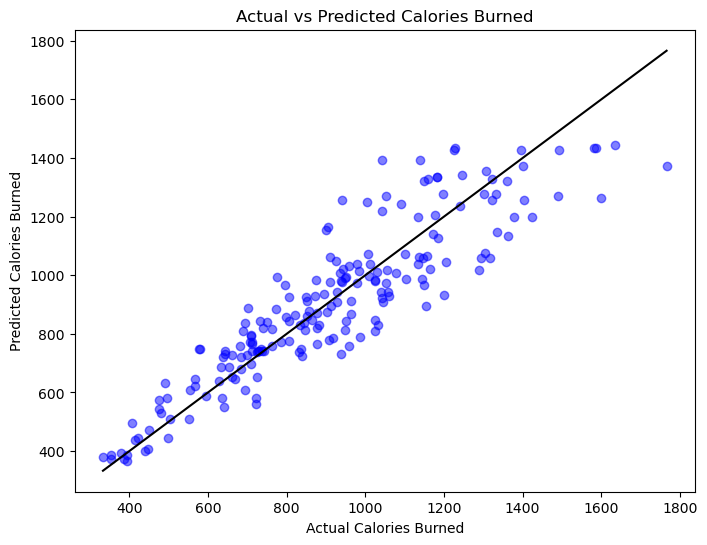

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('source.csv')

x = data[['Experience_Level', 'Session_Duration (hours)']]
y = data['Calories_Burned']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

model= LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print( f"Coefficients: {model.coef_}")
print( f"Intercept: {model.intercept_}")

plt.figure(figsize= (8,6))
plt.scatter(y_test, y_pred, color='blue', alpha= 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color= 'black')
plt.title("Actual vs Predicted Calories Burned")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.show()


Due to the strong relationship between Session Duration in hours and average calories burned in a session, a linear regression using a singluar variable can also be created. Using an individuals session duration in hours this model can accurately predict approximately how many calories the person has burned or will burn.

Coefficients: [724.41697682]
Intercept: -5.807918457490814


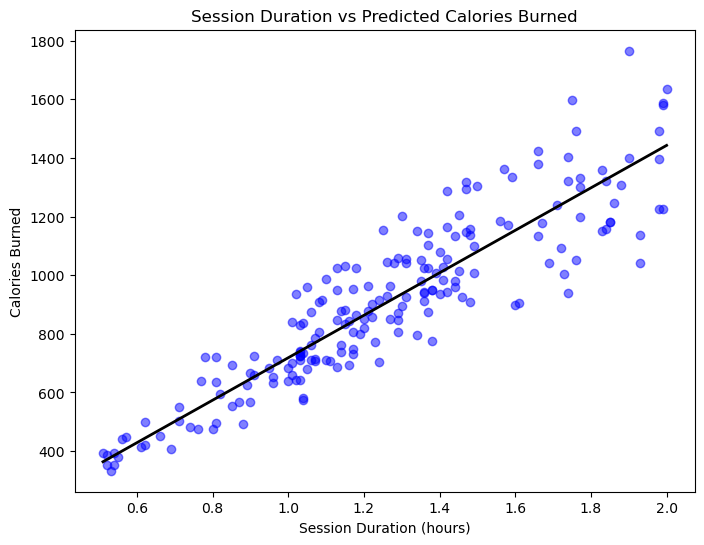

In [19]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

x = data[["Session_Duration (hours)"]]
y = data["Calories_Burned"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

model= LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print( f"Coefficients: {model.coef_}")
print( f"Intercept: {model.intercept_}")

plt.figure(figsize= (8,6))
plt.scatter(x_test, y_test, color='blue', alpha= 0.5, label= "Actual Data")
x_range = np.linspace(x_test.min(), x_test.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color= 'black', label="Line of Best Fit", linewidth=2)
plt.title("Session Duration vs Predicted Calories Burned")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.show()



## Conclusion

In conclusion, by using the Gym Members Exercise Dataset we have determined that the average calories an individual will burn during a workout can best be predicted using their Session Duration in hours and their overall Experience Level. Factors like Gender, Age, BMI, BPM, and Workout Type may have a very small impact on the calories burned however this impact is not strong enough to establish any kind of correlation, making them unreliable to use as any kind of predictor.